In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm




In [2]:
df = pd.read_csv("lego.population.csv", sep=",", encoding="latin1")
# fjerner forklaringsvariabler vi ikke trenger


df2 = df[
    ["Set_Name", "Theme", "Gender", "Ages", "Price", "Pages", "Pieces",  "Unique_Pieces"]
]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()


# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2["Theme"] = df2["Theme"].astype(str)
df2["Theme"] = df2["Theme"].str.replace(r"[^a-zA-Z0-9\s-]", "", regex=True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2["Price"] = df2["Price"].str.replace("\$", "", regex=True)

# og gjør så prisen om til float
df2["Price"] = df2["Price"].astype(float)






df2


,Set_Name,Theme,Gender,Ages,Price,Pages,Pieces,Unique_Pieces
0,Batboat The Penguin Pursuit!,Batman,B,Ages_4+,9.99,44.0,54.0,41.0
1,Battle-Ready Batman and MetalBeard,Batman,B,Ages_6+,19.99,64.0,168.0,98.0
2,Batman vs. The Riddler Robbery,Batman,B,Ages_4+,9.99,36.0,59.0,44.0
3,Batman: The Attack of the Talons,Batman,B,Ages_7-12,19.99,60.0,155.0,82.0
4,Batman Batsub and the Underwater Clash,Batman,B,Ages_7+,19.99,64.0,174.0,82.0
...,...,...,...,...,...,...,...,...
1294,Death Star Final Duel,Star Wars,B,Ages_9+,99.99,140.0,775.0,241.0
1295,Resistance I-TS Transport,Star Wars,B,Ages_9+,99.99,140.0,932.0,215.0
1297,TIE Fighter Pilot,Star Wars,B,Ages_18+,59.99,148.0,724.0,155.0
1298,Y-wing Starfighter,Star Wars,B,Ages_14+,199.99,220.0,1967.0,359.0


In [3]:
formel = 'Price ~ Gender'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.26e-06
Time:                        14:45:41   Log-Likelihood:                -5039.3
No. Observations:                 922   AIC:                         1.008e+04
Df Residuals:                     919   BIC:                         1.010e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.1725      2.498     21.683      0.000      49.269      59.076
Gender[T.G]   -23.8643      4.990     -4.783      0.000     -33.657     -14.072
Gender[T.N]   -10.6211      4.601     -2.309      0.021     -19.650      -1.592
==============================================================================
Omnibus:                      837.896   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31211.617
Skew:                           4.089   Prob(JB):                         0.00
Kurtosis:                      30.305   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

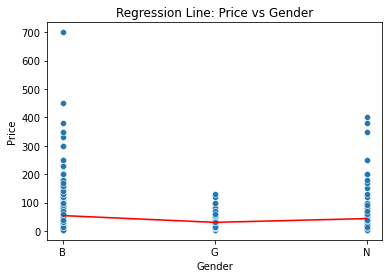

In [7]:
sns.scatterplot(data=df2, x='Gender', y='Price')

# Predicting values for each Gender to plot the regression line
df2['Predicted_Price'] = resultat.predict(df2['Gender'])

# Plotting the regression line
sns.lineplot(data=df2, x='Gender', y='Predicted_Price', color='red')

# Setting labels and title for clarity
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Regression Line: Price vs Gender')

# Show plot
plt.show()

In [ ]:
print(len(df2['Klassifisering_norm']))
print(len(df2['Price']))
print(len(df2['Pieces']))

922
922
922


In [ ]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()


In [ ]:
formel = 'Price ~ Unique_Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()


In [9]:
modell3_mlr = smf.ols('Price ~ Pieces * Gender', data=df2)
results_mlr = modell3_mlr.fit()
summary_mlr = results_mlr.summary()
summary_mlr

#Endre til b g og n. Må være tekstvariabel. Model B i forelesning. 
#teste om gutte og jenteego har forskjellig stignignstall

#Pieces forklarer mer av total, unieue forkl

#Skjæringspunkt er ikke viktig, interaksjon.
# Ages - Pieces forklarer mye av prisen, se om Alder etter pieces har noe å si 

#Jentelego har generelt mindre pieces enn guttelego. Samme pris for page. Ta med antall pages, det kan forklare noe om guttelego er vanskeligere
#Totalt pieces har ikke en signifikant forsjell mellom g og p
# Stor p-verdi. Kan ikke argumentere for det ekstra stigningstallet for Guttelego er forsjellig fra null. Vi kan ikke si de er forsjellige

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1211.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:09:48   Log-Likelihood:                -4115.6
No. Observations:                 922   AIC:                             8243.
Df Residuals:                     916   BIC:                             8272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.8351      1.155      6.786      0.000       5.569      10.101
Gender[T.G]            0.8465      2.623      0.323      0.747      -4.302       5.995
Gender[T.N]            2.0275      2.050      0.989      0.323      -1.997       6.052
Pieces                 0.0941      0.001     66.271      0.000       0.091       0.097
Pieces:Gender[T.G]    -0.0063      0.007     -0.882      0.378      -0.020       0.008
Pieces:Gender[T.N]    -0.0211      0.002     -8.616      0.000      -0.026      -0.016
==============================================================================
Omnibus:                      664.073   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29500.510
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      30.160   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modell3_mlr = smf.ols('Price ~ Unique_Pieces * Gender', data=df2)
results_mlr = modell3_mlr.fit()
summary_mlr = results_mlr.summary()
summary_mlr

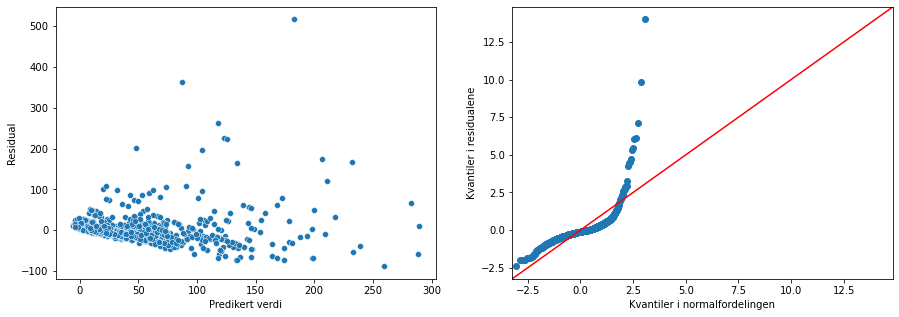

In [84]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlr.fit().fittedvalues, y = modell3_mlr.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlr.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
print(df2["Price"].median())
print(df2["Price"].mean())

#About 20% more expensive than the median
#About 15% more expensive than the mean

29.99
47.08273318872027


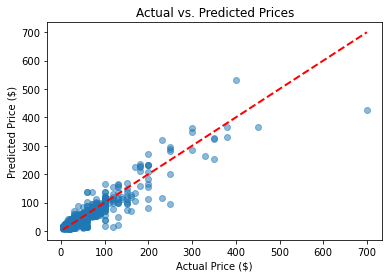

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2725.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:11:30   Log-Likelihood:                -4158.7
No. Observations:                 922   AIC:                             8323.
Df Residuals:                     919   BIC:                             8338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.4645      1.105      9.472      0.000       8.296      12.633
Pieces                  0.0868      0.001     72.718      0.000       0.084       0.089
Klassifisering_norm    -2.2444      0.933     -2.405      0.016      -4.076      -0.413
==============================================================================
Omnibus:                      740.265   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45984.119
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      37.022   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df2['Predicted_Price'] = results_mlr.predict(df2[['Pieces', 'Klassifisering_norm']])

plt.scatter(df2['Price'], df2['Predicted_Price'], alpha=0.5)
plt.plot([df2['Price'].min(), df2['Price'].max()], 
         [df2['Price'].min(), df2['Price'].max()], 
         '--', color='red', linewidth=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted Prices')
plt.show()

summary_mlr


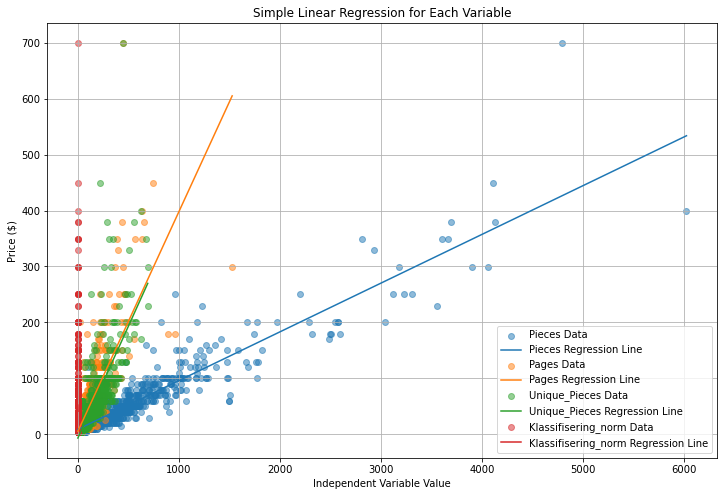

In [ ]:
def simple_linear_regression(data, independent_var, dependent_var='Price'):
    # Define the formula for OLS regression
    formula = f'{dependent_var} ~ {independent_var}'
    # Fit the model
    model = smf.ols(formula, data=data).fit()
    return model

def plot_regression_line(data, independent_var, dependent_var='Price', model=None):
    if model is None:
        model = simple_linear_regression(data, independent_var, dependent_var)
    
    # Create a range of values for the independent variable
    x_range = np.linspace(data[independent_var].min(), data[independent_var].max(), 100)
    # Predict the dependent variable for the range of independent variable values
    y_range = model.params['Intercept'] + model.params[independent_var] * x_range
    
    # Plot the data points
    plt.scatter(data[independent_var], data[dependent_var], alpha=0.5, label=f'{independent_var} Data')
    # Plot the regression line
    plt.plot(x_range, y_range, label=f'{independent_var} Regression Line')



variables = ['Pieces', 'Pages', 'Unique_Pieces', "Klassifisering_norm"]
plt.figure(figsize=(12, 8))
for var in variables:
    model = simple_linear_regression(df2, var)
    plot_regression_line(df2, var, model=model)
plt.xlabel('Independent Variable Value')
plt.ylabel('Price ($)')
plt.title('Simple Linear Regression for Each Variable')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'modell3_mlri' is not defined

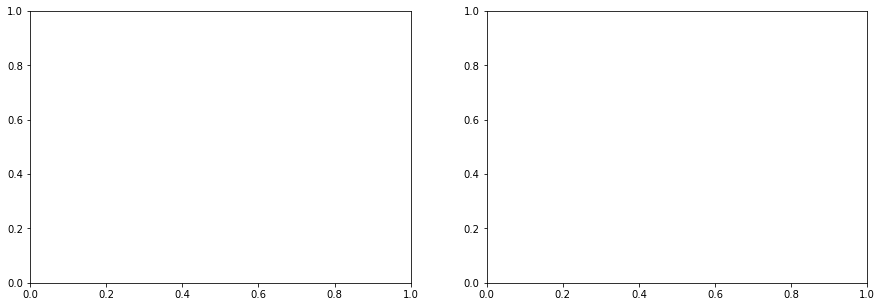